Μύρων Κουφόπουλος ΑΜ:4398

In [1]:
import pandas
import pandas as pd
import numpy as np
import sklearn.cluster as sk_cluster
import sklearn.metrics as metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import fetch_20newsgroups
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as hr
import scipy.spatial.distance as sp_dist

# exercise 3

In [2]:
file = 'phily_businesses.csv'
df_businesses = pd.read_csv(file)
df_businesses.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107.0,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
1,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,Philadelphia,PA,19106.0,39.953949,-75.143226,4.0,245,1,"{'RestaurantsReservations': 'True', 'Restauran...","Sushi Bars, Restaurants, Japanese","{'Tuesday': '13:30-22:0', 'Wednesday': '13:30-..."
2,ROeacJQwBeh05Rqg7F6TCg,BAP,1224 South St,Philadelphia,PA,19147.0,39.943223,-75.162568,4.5,205,1,"{'NoiseLevel': ""u'quiet'"", 'GoodForMeal': ""{'d...","Korean, Restaurants","{'Monday': '11:30-20:30', 'Tuesday': '11:30-20..."
3,QdN72BWoyFypdGJhhI5r7g,Bar One,767 S 9th St,Philadelphia,PA,19147.0,39.939825,-75.157447,4.0,65,0,"{'Smoking': ""u'no'"", 'NoiseLevel': ""u'average'...","Cocktail Bars, Bars, Italian, Nightlife, Resta...","{'Monday': '16:0-0:0', 'Tuesday': '16:0-0:0', ..."
4,Mjboz24M9NlBeiOJKLEd_Q,DeSandro on Main,4105 Main St,Philadelphia,PA,19127.0,40.022466,-75.218314,3.0,41,0,"{'RestaurantsReservations': 'False', 'Caters':...","Pizza, Restaurants, Salad, Soup","{'Tuesday': '17:0-21:30', 'Wednesday': '17:0-1..."


In [3]:
df_businesses.shape

(14569, 14)

In [4]:
df_businesses.isnull().sum()

business_id        0
name               0
address          526
city               0
state              0
postal_code        8
latitude           0
longitude          0
stars              0
review_count       0
is_open            0
attributes      1170
categories         9
hours           2784
dtype: int64

In [5]:
# drop values that are None
df_bus = df_businesses.dropna(how='any')
df_bus = df_bus.reset_index()
df_bus.head()

,index,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107.0,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
1,1,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,Philadelphia,PA,19106.0,39.953949,-75.143226,4.0,245,1,"{'RestaurantsReservations': 'True', 'Restauran...","Sushi Bars, Restaurants, Japanese","{'Tuesday': '13:30-22:0', 'Wednesday': '13:30-..."
2,2,ROeacJQwBeh05Rqg7F6TCg,BAP,1224 South St,Philadelphia,PA,19147.0,39.943223,-75.162568,4.5,205,1,"{'NoiseLevel': ""u'quiet'"", 'GoodForMeal': ""{'d...","Korean, Restaurants","{'Monday': '11:30-20:30', 'Tuesday': '11:30-20..."
3,3,QdN72BWoyFypdGJhhI5r7g,Bar One,767 S 9th St,Philadelphia,PA,19147.0,39.939825,-75.157447,4.0,65,0,"{'Smoking': ""u'no'"", 'NoiseLevel': ""u'average'...","Cocktail Bars, Bars, Italian, Nightlife, Resta...","{'Monday': '16:0-0:0', 'Tuesday': '16:0-0:0', ..."
4,4,Mjboz24M9NlBeiOJKLEd_Q,DeSandro on Main,4105 Main St,Philadelphia,PA,19127.0,40.022466,-75.218314,3.0,41,0,"{'RestaurantsReservations': 'False', 'Caters':...","Pizza, Restaurants, Salad, Soup","{'Tuesday': '17:0-21:30', 'Wednesday': '17:0-1..."


In [6]:
df_bus.shape

(10692, 15)

In [7]:
df_restaurants = df_bus[df_bus['categories'].str.contains('Restaurants')]
#df_restaurants = df_restaurants.reset_index()
df_restaurants.head()

,index,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107.0,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
1,1,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,Philadelphia,PA,19106.0,39.953949,-75.143226,4.0,245,1,"{'RestaurantsReservations': 'True', 'Restauran...","Sushi Bars, Restaurants, Japanese","{'Tuesday': '13:30-22:0', 'Wednesday': '13:30-..."
2,2,ROeacJQwBeh05Rqg7F6TCg,BAP,1224 South St,Philadelphia,PA,19147.0,39.943223,-75.162568,4.5,205,1,"{'NoiseLevel': ""u'quiet'"", 'GoodForMeal': ""{'d...","Korean, Restaurants","{'Monday': '11:30-20:30', 'Tuesday': '11:30-20..."
3,3,QdN72BWoyFypdGJhhI5r7g,Bar One,767 S 9th St,Philadelphia,PA,19147.0,39.939825,-75.157447,4.0,65,0,"{'Smoking': ""u'no'"", 'NoiseLevel': ""u'average'...","Cocktail Bars, Bars, Italian, Nightlife, Resta...","{'Monday': '16:0-0:0', 'Tuesday': '16:0-0:0', ..."
4,4,Mjboz24M9NlBeiOJKLEd_Q,DeSandro on Main,4105 Main St,Philadelphia,PA,19127.0,40.022466,-75.218314,3.0,41,0,"{'RestaurantsReservations': 'False', 'Caters':...","Pizza, Restaurants, Salad, Soup","{'Tuesday': '17:0-21:30', 'Wednesday': '17:0-1..."


In [8]:
df_restaurants.shape

(4810, 15)

In [9]:
df_japan = df_restaurants[df_restaurants['categories'].str.contains('Japanese')]
df_jap_merge = df_japan[df_japan['categories'].str.contains('Italian|Burgers')==False]
#df_japan = df_japan.reset_index()
df_jap_merge.shape

(204, 15)

In [10]:
df_jap_merge.head()

,index,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
1,1,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,Philadelphia,PA,19106.0,39.953949,-75.143226,4.0,245,1,"{'RestaurantsReservations': 'True', 'Restauran...","Sushi Bars, Restaurants, Japanese","{'Tuesday': '13:30-22:0', 'Wednesday': '13:30-..."
13,15,WYYdQDjx-DsCanlP0DpImQ,J Sushi,243 S 10th St,Philadelphia,PA,19107.0,39.947033,-75.157434,4.5,72,0,"{'Ambience': ""{'touristy': False, 'hipster': F...","Seafood, Restaurants, Sushi Bars, Japanese","{'Tuesday': '11:0-22:0', 'Wednesday': '11:0-22..."
79,104,L_sXNadtVHjxMw7Yhvkj9Q,Naoki Ramen,915 Race St,Philadelphia,PA,19107.0,39.955454,-75.154900,4.0,92,0,"{'WiFi': ""u'free'"", 'WheelchairAccessible': 'F...","Ramen, Restaurants, Japanese","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
121,165,Bw0cpnfI-Y9QmjWzqS-oFg,Izumi,1601 E Passyunk Ave,Philadelphia,PA,19148.0,39.929738,-75.163396,4.0,219,0,"{'RestaurantsTakeOut': 'True', 'HasTV': 'False...","Restaurants, Sushi Bars, Desserts, Food, Japanese","{'Tuesday': '17:0-22:0', 'Wednesday': '17:0-22..."
201,282,ld1b8y_PHH6Mn_e7T0u04g,Gachi Sushi and Noodle,"8500 Essington Ave, A West Terminal",Philadelphia,PA,19153.0,39.894612,-75.229295,4.0,95,1,"{'OutdoorSeating': 'False', 'RestaurantsReserv...","Noodles, Japanese, Restaurants, Sushi Bars","{'Monday': '5:0-22:0', 'Tuesday': '5:0-22:0', ..."


In [11]:
df_italian = df_restaurants[df_restaurants['categories'].str.contains('Italian')]
df_ital_merge = df_italian[df_italian['categories'].str.contains('Japanese|Burgers')==False]
#df_ital_merge = df_ital_merge.reset_index()
df_ital_merge.shape

(431, 15)

In [12]:
df_ital_merge.head()

,index,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
3,3,QdN72BWoyFypdGJhhI5r7g,Bar One,767 S 9th St,Philadelphia,PA,19147.0,39.939825,-75.157447,4.0,65,0,"{'Smoking': ""u'no'"", 'NoiseLevel': ""u'average'...","Cocktail Bars, Bars, Italian, Nightlife, Resta...","{'Monday': '16:0-0:0', 'Tuesday': '16:0-0:0', ..."
61,77,PdMXmOWDRHICAx6SLgu1dQ,24,2401 Walnut St,Philadelphia,PA,19103.0,39.951521,-75.179873,3.5,111,0,"{'BikeParking': 'True', 'RestaurantsTableServi...","Italian, Bars, Restaurants, Nightlife, Wine Ba...","{'Monday': '17:0-21:0', 'Tuesday': '17:0-21:0'..."
115,155,TttFjRQ-8Iz8by4hsD7iOQ,Angelina's,743 S 8th St,Philadelphia,PA,19147.0,39.940221,-75.155797,4.5,49,1,"{'Alcohol': ""u'none'"", 'WiFi': ""u'free'"", 'Res...","Restaurants, Italian","{'Wednesday': '17:0-22:0', 'Thursday': '17:0-2..."
120,163,Pb5agnsD9EdCl6yuZp2jJA,O Sole Mio,250 Catharine St,Philadelphia,PA,19147.0,39.937829,-75.148263,4.5,85,1,"{'RestaurantsGoodForGroups': 'True', 'Restaura...","Food, Seafood, Sardinian, Gelato, Restaurants,...","{'Tuesday': '11:0-22:0', 'Wednesday': '11:0-22..."
162,221,agTcS5LYZJe4gNiXK6nNkw,Buca D’Oro,711 Locust St,Philadelphia,PA,19106.0,39.947077,-75.154166,4.0,5,1,"{'RestaurantsDelivery': 'False', 'RestaurantsT...","Italian, Restaurants","{'Monday': '17:0-21:0', 'Tuesday': '17:0-21:0'..."


In [19]:
df_burgers = df_restaurants[df_restaurants['categories'].str.contains('Burgers')]
df_burg_merge = df_burgers[df_burgers['categories'].str.contains('Japanese|Italian')==False]
#df_burg_merge = df_burg_merge.reset_index()
df_burg_merge.shape

(316, 15)

In [20]:
df_burg_merge.head()

,index,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
16,18,O1oZpbZNDMH_gz8DhsZCdA,Wendy's,700 E. Hunting Park,Philadelphia,PA,19124.0,40.012141,-75.115015,1.5,15,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsPri...","Burgers, Restaurants, Fast Food","{'Monday': '10:0-2:0', 'Tuesday': '10:0-2:0', ..."
35,44,dChRGpit9fM_kZK5pafNyA,The Love,130 S 18th St,Philadelphia,PA,19103.0,39.950656,-75.170899,4.0,618,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Restaurants, American (New), Breakfast & Brunc...","{'Monday': '0:0-0:0', 'Tuesday': '17:0-21:0', ..."
50,63,CPgWuWGZ4v2sZr5_-1kluw,Checkers,1208 N. Broad,Philadelphia,PA,19121.0,39.971941,-75.159771,2.0,21,1,"{'OutdoorSeating': 'True', 'RestaurantsAttire'...","Restaurants, Fast Food, Burgers","{'Monday': '10:0-4:0', 'Tuesday': '10:0-4:0', ..."
51,65,VCkSUsdL5P0p16DAPxVROA,NY Bagel & Deli Shop,1120 Buttonwood St,Philadelphia,PA,19123.0,39.960811,-75.157388,4.0,31,1,"{'NoiseLevel': ""u'average'"", 'GoodForMeal': ""{...","Bagels, Food, Breakfast & Brunch, Coffee & Tea...","{'Monday': '7:0-16:0', 'Tuesday': '7:0-16:0', ..."
58,74,kLSEk3qXY1KdtFjxHJ9pww,McDonald's,501 Franklin Mill Cir,Philadelphia,PA,19154.0,40.088416,-74.965011,1.5,20,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Restaurants, Fast Food, Food, Coffee & Tea, Bu...","{'Monday': '5:30-0:0', 'Tuesday': '5:30-0:0', ..."


In [21]:
df_bus_all = pandas.concat([df_jap_merge,df_ital_merge,df_burg_merge])
#df_bus_all.reset_index()
df_bus_all.head()

,index,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
1,1,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,Philadelphia,PA,19106.0,39.953949,-75.143226,4.0,245,1,"{'RestaurantsReservations': 'True', 'Restauran...","Sushi Bars, Restaurants, Japanese","{'Tuesday': '13:30-22:0', 'Wednesday': '13:30-..."
13,15,WYYdQDjx-DsCanlP0DpImQ,J Sushi,243 S 10th St,Philadelphia,PA,19107.0,39.947033,-75.157434,4.5,72,0,"{'Ambience': ""{'touristy': False, 'hipster': F...","Seafood, Restaurants, Sushi Bars, Japanese","{'Tuesday': '11:0-22:0', 'Wednesday': '11:0-22..."
79,104,L_sXNadtVHjxMw7Yhvkj9Q,Naoki Ramen,915 Race St,Philadelphia,PA,19107.0,39.955454,-75.154900,4.0,92,0,"{'WiFi': ""u'free'"", 'WheelchairAccessible': 'F...","Ramen, Restaurants, Japanese","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
121,165,Bw0cpnfI-Y9QmjWzqS-oFg,Izumi,1601 E Passyunk Ave,Philadelphia,PA,19148.0,39.929738,-75.163396,4.0,219,0,"{'RestaurantsTakeOut': 'True', 'HasTV': 'False...","Restaurants, Sushi Bars, Desserts, Food, Japanese","{'Tuesday': '17:0-22:0', 'Wednesday': '17:0-22..."
201,282,ld1b8y_PHH6Mn_e7T0u04g,Gachi Sushi and Noodle,"8500 Essington Ave, A West Terminal",Philadelphia,PA,19153.0,39.894612,-75.229295,4.0,95,1,"{'OutdoorSeating': 'False', 'RestaurantsReserv...","Noodles, Japanese, Restaurants, Sushi Bars","{'Monday': '5:0-22:0', 'Tuesday': '5:0-22:0', ..."


In [22]:
df_bus_all.shape

(951, 15)

In [23]:
df_bus_all.columns

Index(['index', 'business_id', 'name', 'address', 'city', 'state',
       'postal_code', 'latitude', 'longitude', 'stars', 'review_count',
       'is_open', 'attributes', 'categories', 'hours'],
      dtype='object')

In [24]:
file = 'yelp_reviews_philadelphia.csv'
df_reviews = pd.read_csv(file)
df_reviews.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,categories,hours,review_id,user_id,review_stars,useful,funny,cool,text,date
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,...,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",BXQcBN0iAi1lAUxibGLFzA,6_SpY41LIHZuIaiDs5FMKA,4,0,0,1,This is nice little Chinese bakery in the hear...,2014-05-26 01:09:53
1,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,...,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",uduvUCvi9w3T2bSGivCfXg,tCXElwhzekJEH6QJe3xs7Q,4,3,1,2,This is the bakery I usually go to in Chinatow...,2013-10-05 15:19:06
2,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,...,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",a0vwPOqDXXZuJkbBW2356g,WqfKtI-aGMmvbA9pPUxNQQ,5,0,0,0,"A delightful find in Chinatown! Very clean, an...",2013-10-25 01:34:57
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,...,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",MKNp_CdR2k2202-c8GN5Dw,3-1va0IQfK-9tUMzfHWfTA,5,5,0,5,I ordered a graduation cake for my niece and i...,2018-05-20 17:58:57
4,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,...,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",D1GisLDPe84Rrk_R4X2brQ,EouCKoDfzaVG0klEgdDvCQ,4,2,1,1,HK-STYLE MILK TEA: FOUR STARS\n\nNot quite su...,2013-10-25 02:31:35


In [25]:
df_reviews.shape

(885255, 22)

In [26]:
df_final = pd.merge(df_reviews,df_bus_all,on = 'business_id',how='inner') # merge with the same business_id(their key)
df_final.head()

,business_id,name_x,address_x,city_x,state_x,postal_code_x,latitude_x,longitude_x,stars_x,review_count_x,...,state_y,postal_code_y,latitude_y,longitude_y,stars_y,review_count_y,is_open_y,attributes_y,categories_y,hours_y
0,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,Philadelphia,PA,19106,39.953949,-75.143226,4.0,245,...,PA,19106.0,39.953949,-75.143226,4.0,245,1,"{'RestaurantsReservations': 'True', 'Restauran...","Sushi Bars, Restaurants, Japanese","{'Tuesday': '13:30-22:0', 'Wednesday': '13:30-..."
1,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,Philadelphia,PA,19106,39.953949,-75.143226,4.0,245,...,PA,19106.0,39.953949,-75.143226,4.0,245,1,"{'RestaurantsReservations': 'True', 'Restauran...","Sushi Bars, Restaurants, Japanese","{'Tuesday': '13:30-22:0', 'Wednesday': '13:30-..."
2,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,Philadelphia,PA,19106,39.953949,-75.143226,4.0,245,...,PA,19106.0,39.953949,-75.143226,4.0,245,1,"{'RestaurantsReservations': 'True', 'Restauran...","Sushi Bars, Restaurants, Japanese","{'Tuesday': '13:30-22:0', 'Wednesday': '13:30-..."
3,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,Philadelphia,PA,19106,39.953949,-75.143226,4.0,245,...,PA,19106.0,39.953949,-75.143226,4.0,245,1,"{'RestaurantsReservations': 'True', 'Restauran...","Sushi Bars, Restaurants, Japanese","{'Tuesday': '13:30-22:0', 'Wednesday': '13:30-..."
4,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,Philadelphia,PA,19106,39.953949,-75.143226,4.0,245,...,PA,19106.0,39.953949,-75.143226,4.0,245,1,"{'RestaurantsReservations': 'True', 'Restauran...","Sushi Bars, Restaurants, Japanese","{'Tuesday': '13:30-22:0', 'Wednesday': '13:30-..."


In [27]:
df_final.shape

(155680, 36)

In [28]:
df_group = df_final[['business_id','text']].groupby('business_id').agg({'text':''.join})
df_group = df_group.reset_index()
df_group

,business_id,text
0,-AbzJTLQdbdQrhRzQLgsKA,Kingyo has summer appetizer specials for $3.00...
1,-HxLFWKVgXSU8JlR21PBkg,"""Carluccio's: Way Delish""\n\nEver find yoursel..."
2,-LmhsdQproqCf5EQoD06rQ,Down in south Philly for a meeting at my daugh...
3,-MkngKKkTIVfnUbq2S1ucQ,Dee-frickin'-licious thick crust pizza!!! I or...
4,-PMXnNJ1D67NkAupRHNkpQ,I've always preferred domino's over pizza hut!...
...,...,...
946,zUJMvjK6aBeQtVCowZ85-w,"Excelent! Food is wondeful, hot, and fresh! Th..."
947,zeounyPVXFZEz1c9KtptLA,"Pizza, wings, steaks are good.. chicken finger..."
948,zgX8sYCRGVJ9M5LETpJ60A,I popped in there one afternoon to pick up som...
949,zqisPpgCURrgLf4TVnI8RQ,This review is for poke bowl. Very fresh salad...


In [29]:
# take a vector for every business
vectorizer = TfidfVectorizer(stop_words='english', min_df=10,max_df=0.8,max_features=1000)
dtm = vectorizer.fit_transform(df_group['text'])

In [30]:
dtm
# morfh me min_df=4 kai max_df=0.8
# business   emfaniseis      ?    (gia katanohsh, den uparxoun)
# (0,        10    )        0.012
# (950,      887   )        0.032

<951x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 470870 stored elements in Compressed Sparse Row format>

In [31]:
print(dtm)

  (0, 179)	0.013076151033460675
  (0, 657)	0.013709865550761233
  (0, 311)	0.009680711639279964
  (0, 685)	0.01111506229527466
  (0, 695)	0.010954376547586235
  (0, 820)	0.019609566518083474
  (0, 72)	0.01778087989380884
  (0, 268)	0.02267179305269708
  (0, 101)	0.011304641298016248
  (0, 661)	0.010185671212718541
  (0, 467)	0.021332164762862607
  (0, 565)	0.01540912837088455
  (0, 16)	0.01149890173375424
  (0, 730)	0.018873126741929314
  (0, 686)	0.01439913474293783
  (0, 43)	0.011355976866259814
  (0, 303)	0.012839408558297778
  (0, 666)	0.011330267209658976
  (0, 962)	0.012949002440891975
  (0, 441)	0.010560638760865946
  (0, 132)	0.012549412951269361
  (0, 481)	0.013092190076566198
  (0, 974)	0.010549009567442692
  (0, 387)	0.01984754495795601
  (0, 479)	0.02738503583754874
  :	:
  (950, 911)	0.01771020006388408
  (950, 15)	0.017033470263363167
  (950, 294)	0.02021889671136498
  (950, 780)	0.02135137635047202
  (950, 805)	0.045670418062839675
  (950, 818)	0.04446604547564779
  (950

# 1.

In [31]:
print(df_group.shape)
df_group.head()

(951, 2)


,business_id,text
0,-AbzJTLQdbdQrhRzQLgsKA,Kingyo has summer appetizer specials for $3.00...
1,-HxLFWKVgXSU8JlR21PBkg,"""Carluccio's: Way Delish""\n\nEver find yoursel..."
2,-LmhsdQproqCf5EQoD06rQ,Down in south Philly for a meeting at my daugh...
3,-MkngKKkTIVfnUbq2S1ucQ,Dee-frickin'-licious thick crust pizza!!! I or...
4,-PMXnNJ1D67NkAupRHNkpQ,I've always preferred domino's over pizza hut!...


In [32]:
# First sort values from index
df_bus_new = df_bus_all.sort_values(by=['index'])
print(df_bus_new.shape)
df_bus_new.head()

(951, 15)


,index,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
1,1,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,Philadelphia,PA,19106.0,39.953949,-75.143226,4.0,245,1,"{'RestaurantsReservations': 'True', 'Restauran...","Sushi Bars, Restaurants, Japanese","{'Tuesday': '13:30-22:0', 'Wednesday': '13:30-..."
3,3,QdN72BWoyFypdGJhhI5r7g,Bar One,767 S 9th St,Philadelphia,PA,19147.0,39.939825,-75.157447,4.0,65,0,"{'Smoking': ""u'no'"", 'NoiseLevel': ""u'average'...","Cocktail Bars, Bars, Italian, Nightlife, Resta...","{'Monday': '16:0-0:0', 'Tuesday': '16:0-0:0', ..."
13,15,WYYdQDjx-DsCanlP0DpImQ,J Sushi,243 S 10th St,Philadelphia,PA,19107.0,39.947033,-75.157434,4.5,72,0,"{'Ambience': ""{'touristy': False, 'hipster': F...","Seafood, Restaurants, Sushi Bars, Japanese","{'Tuesday': '11:0-22:0', 'Wednesday': '11:0-22..."
16,18,O1oZpbZNDMH_gz8DhsZCdA,Wendy's,700 E. Hunting Park,Philadelphia,PA,19124.0,40.012141,-75.115015,1.5,15,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsPri...","Burgers, Restaurants, Fast Food","{'Monday': '10:0-2:0', 'Tuesday': '10:0-2:0', ..."
35,44,dChRGpit9fM_kZK5pafNyA,The Love,130 S 18th St,Philadelphia,PA,19103.0,39.950656,-75.170899,4.0,618,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Restaurants, American (New), Breakfast & Brunc...","{'Monday': '0:0-0:0', 'Tuesday': '17:0-21:0', ..."


In [33]:
# merge to get the same sequence with the vectorizer(dtm)
df_merge_bus_id = pd.merge(df_group,df_bus_new,how='inner',on='business_id')
print(df_merge_bus_id.shape)
df_merge_bus_id.head()

(951, 16)


,business_id,text,index,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,-AbzJTLQdbdQrhRzQLgsKA,Kingyo has summer appetizer specials for $3.00...,3002,Kingyo,1720 Sansom St,Philadelphia,PA,19103.0,39.950790,-75.169618,3.5,11,0,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Sushi Bars, Restaurants, Japanese","{'Monday': '17:0-22:0', 'Tuesday': '17:0-22:0'..."
1,-HxLFWKVgXSU8JlR21PBkg,"""Carluccio's: Way Delish""\n\nEver find yoursel...",5888,Carluccio's,932 S 10th St,Philadelphia,PA,19147.0,39.938307,-75.159796,4.0,9,0,"{'BusinessParking': ""{'garage': False, 'street...","Italian, Restaurants","{'Tuesday': '11:0-22:0', 'Wednesday': '11:0-22..."
2,-LmhsdQproqCf5EQoD06rQ,Down in south Philly for a meeting at my daugh...,322,The Fat ChickeN,2355 S Bucknell St,Philadelphia,PA,19145.0,39.922705,-75.186136,4.5,10,0,"{'BusinessParking': ""{'garage': False, 'street...","Japanese, Chicken Wings, Fast Food, Restaurants","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
3,-MkngKKkTIVfnUbq2S1ucQ,Dee-frickin'-licious thick crust pizza!!! I or...,2080,Square Pie,600 Catherine St,Philadelphia,PA,19147.0,39.939224,-75.152985,4.5,46,0,"{'HasTV': 'False', 'BusinessAcceptsCreditCards...","Pizza, Restaurants, Italian","{'Tuesday': '17:0-21:0', 'Wednesday': '17:0-21..."
4,-PMXnNJ1D67NkAupRHNkpQ,I've always preferred domino's over pizza hut!...,3319,Domino's Pizza,"6391 Oxford Ave, Ste B",Philadelphia,PA,19111.0,40.044236,-75.087194,1.5,25,1,"{'Caters': 'False', 'BikeParking': 'True', 'Bu...","Restaurants, Pizza, Italian, Chicken Wings, Sa...","{'Monday': '10:0-0:0', 'Tuesday': '10:0-0:0', ..."


In [34]:
# prepare truth table
sr_j_i_b = df_merge_bus_id['categories'].apply(lambda x: 0 if 'Japanese' in x else
                                                   (1 if 'Italian' in x else 
                                                    (2 if 'Burgers' in x else None)))
print(type(sr_j_i_b))
sr_j_i_b

<class 'pandas.core.series.Series'>


0      0
1      1
2      0
3      1
4      1
      ..
946    0
947    1
948    2
949    0
950    1
Name: categories, Length: 951, dtype: int64

In [35]:
true_labels = sr_j_i_b.to_numpy()
print(type(true_labels))
true_labels

<class 'numpy.ndarray'>


array([0, 1, 0, 1, 1, 2, 2, 0, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 2, 1, 1, 0, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 2,
       2, 1, 0, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 0, 1, 1,
       1, 1, 2, 2, 0, 2, 1, 2, 1, 1, 2, 0, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1,
       0, 1, 2, 1, 1, 2, 1, 0, 2, 0, 1, 1, 1, 2, 2, 2, 0, 1, 0, 2, 1, 2,
       0, 2, 1, 0, 0, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 0, 2,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 0, 1, 0, 1, 2,
       1, 2, 0, 1, 2, 0, 0, 1, 0, 2, 1, 0, 1, 1, 2, 1, 2, 1, 2, 1, 0, 1,
       0, 2, 0, 1, 1, 2, 2, 2, 0, 2, 1, 0, 2, 0, 2, 2, 1, 0, 0, 2, 1, 2,
       2, 2, 1, 2, 1, 0, 1, 2, 1, 1, 1, 0, 0, 1, 2, 1, 1, 2, 2, 1, 1, 2,
       1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 0, 2, 1, 1,
       1, 2, 2, 1, 0, 1, 1, 0, 0, 0, 2, 1, 1, 1, 1, 0, 2, 2, 1, 0, 0, 0,
       2, 2, 0, 1, 1, 2, 2, 0, 0, 0, 1, 0, 2, 1, 1, 2, 0, 2, 0, 0, 1, 1,
       0, 2, 1, 0, 1, 2, 0, 0, 0, 2, 0, 0, 2, 0, 1,

In [36]:
# K-MEANS
kmeans = sk_cluster.KMeans(init='k-means++',n_clusters=3,n_init=10)
kmeans.fit_predict(dtm) 
centroids = kmeans.cluster_centers_
kmeans_labels = kmeans.labels_
error = kmeans.inertia_
print ("The total error of the clustering is: ", error)
print ('\nCluster labels')
print(kmeans_labels)
print ('\n Cluster Centroids')
print (centroids)

The total error of the clustering is:  583.7898120143582

Cluster labels
[2 0 0 1 1 2 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 1 1 2 2 2 2 0 0 1 0 2 0 0 0 1
 0 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 2 0 0 0 0 1 0 2 0 1 0
 0 1 0 2 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 2 0 1 1 0 0 0 2 0 2 0 1 0 0
 0 0 0 2 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 2 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1
 0 2 0 2 0 0 0 0 2 1 0 2 0 0 2 0 0 2 0 0 0 0 0 0 0 1 2 0 2 0 2 1 0 0 0 0 2
 0 1 2 0 2 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 2 2 0 0 1 0 0 0 0 0 1 0 0
 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 2 0 0 0 0 0 0 0 2 1 0 2 2 0 0 0 0 1 0 2 0
 1 0 0 2 2 0 0 2 1 0 0 0 2 0 0 0 2 0 1 1 0 2 0 2 0 1 1 2 0 0 2 1 0 2 2 2 0
 2 2 0 0 1 0 0 2 0 0 0 0 1 0 2 0 1 0 0 0 0 0 0 0 0 0 0 0 2 0 0 1 2 0 0 1 0
 0 0 1 0 0 2 0 0 0 1 0 0 0 0 1 0 0 1 0 2 0 1 2 1 1 0 0 0 0 0 1 0 0 0 0 0 1
 1 2 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 2 0 0 1 1 0 0 0 0 2 0 1 0 0 0 0 0 0 0 2
 0 0 0 0 0 2 2 0 0 0 0 1 0 0 0 2 0 0 0 1 1 1 1 0 0 0 0 0 1 0 2 1 0 0 0 0 1
 0 1 0 2 0 0 2 0 0 2 0 2 2 

[[ 67 264 291]
 [  0 167  24]
 [137   0   1]]


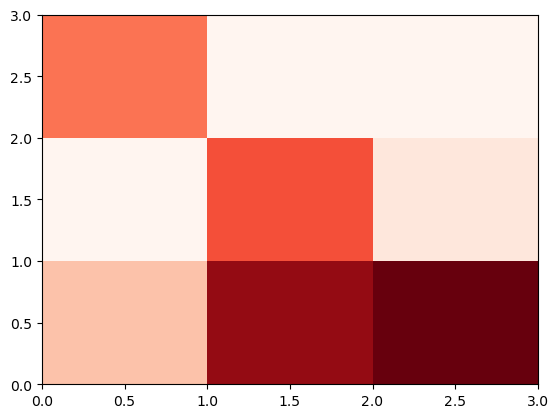

In [37]:
C= metrics.confusion_matrix(kmeans_labels,true_labels)
print (C)
plt.pcolormesh(C,cmap=plt.cm.Reds)

[[137   0   1]
 [  0 167  24]
 [ 67 264 291]]


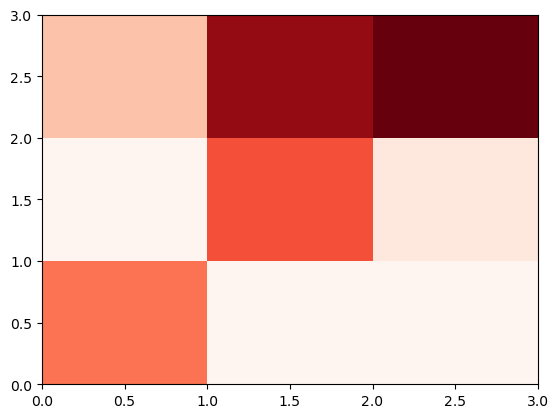

In [38]:
def cluster_class_mapping(kmeans_labels,true_labels):
    C= metrics.confusion_matrix(kmeans_labels,true_labels)
    mapping = list(np.argmax(C,axis=1)) #for each row (cluster) find the best,→class in the confusion matrix
    mapped_kmeans_labels = [mapping[l] for l in kmeans_labels]
    C2= metrics.confusion_matrix(mapped_kmeans_labels,true_labels)
    return mapped_kmeans_labels,C2

mapped_kmeans_labels,C = cluster_class_mapping(kmeans_labels,true_labels)
print(C)
plt.pcolormesh(C, cmap=plt.cm.Reds)

# agglomerative

In [ ]:
# AGGLOMERATIVE (for all linkage parameters) 
# (ward,complete,average,single)

In [39]:
def agglomerative(name_agglo,num_clusters):
    agglo = sk_cluster.AgglomerativeClustering(linkage = name_agglo, n_clusters = num_clusters)
    X = dtm.toarray()
    agglo_labels = agglo.fit_predict(X)
    C_agglo= metrics.confusion_matrix(agglo_labels,true_labels)
    print ("Unmapped : ")
    print(C_agglo)
    #plt.pcolor(C_agglo,cmap=plt.cm.coolwarm)
    plt.pcolormesh(C_agglo,cmap=plt.cm.Reds)
    mapped_agglo_labels,C_agglo = cluster_class_mapping(agglo_labels,true_labels)
    print("Unmapped : ")
    print(C_agglo)

In [ ]:
# AGGLOMERATIVE (complete)

Unmapped : 
[[ 54 298  91]
 [ 61 133 225]
 [ 89   0   0]]
Unmapped : 
[[ 89   0   0]
 [ 54 298  91]
 [ 61 133 225]]


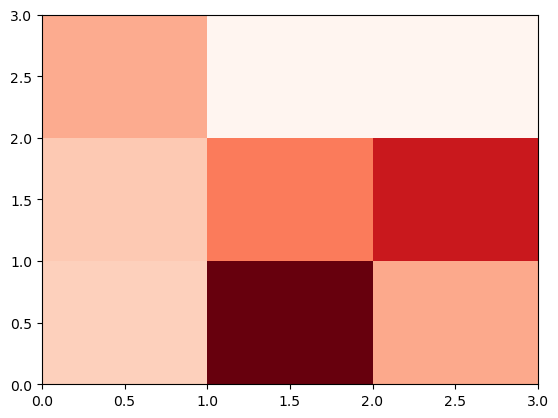

In [40]:
agglomerative('complete',3)

In [39]:
# AGGLOMERATIVE (ward)

Unmapped : 
[[ 98 254 292]
 [  0 177  24]
 [106   0   0]]
Unmapped : 
[[106   0   0]
 [  0 177  24]
 [ 98 254 292]]


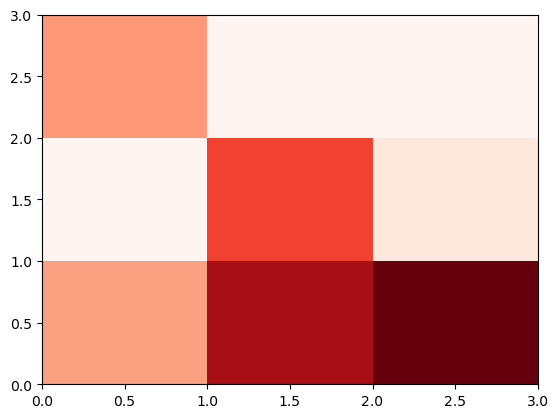

In [41]:
agglomerative('ward',3)

In [ ]:
# AGGLOMERATIVE (average)

Unmapped : 
[[204 429 315]
 [  0   1   0]
 [  0   1   1]]
Unmapped : 
[[  0   0   0]
 [204 431 316]
 [  0   0   0]]


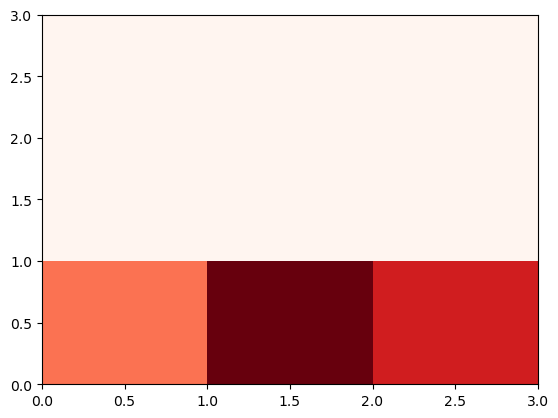

In [42]:
agglomerative('average',3)

In [84]:
# AGGLOMERATIVE (single)

Unmapped : 
[[204 430 315]
 [  0   0   1]
 [  0   1   0]]
Unmapped : 
[[  0   0   0]
 [204 431 315]
 [  0   0   1]]


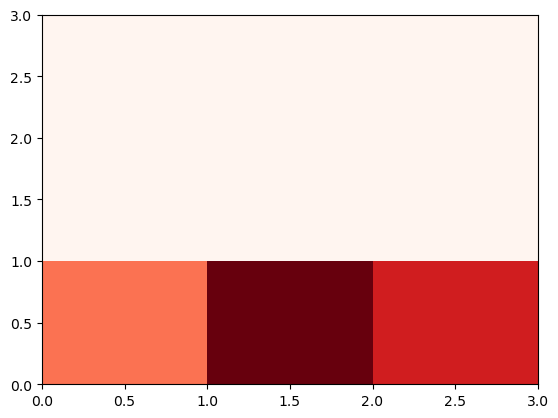

In [43]:
agglomerative('single',3)

Παρατηρήσεις

K-means : Παρατηρούμε πως ο διαχωρισμός στις κατηγορίες γίνεται αρκετά καλά με μόνη εξαίρεση το Italian και το Burgers επειδή έχουν κοινές λέξεις που χρησιμοποιούν. Η απόδοση του K-means είναι πολύ καλή

agglomerative (complete): Παρατηρούμε πως εντοπίζει τις 3 κατηγορίες και κάνει τον διαχωρισμό, όμως μπερδεύει αρκετά κάποιες κατηγορίες και μετράει κάποια αρκετά λανθασμένα.

agglomerative (ward): Βλέπουμε πως είναι ο καλύτερος από τους agglomerative, αυτό διότι υπάρχουν αρκετά μηδενικά, εκτός της διαγωνίου. Αυτό σημαίνει πως για κάποιες κατηγορίες δεν μετράει κανένα λάθος. Τέλος, εντοπίζει και τις 3 κατηγορίες αφού βλέπουμε η διαγώνιος να έχει τις μεγαλύτερες τιμές.

agglomerative (average-single): Βλέπουμε πως δεν εντοπίζονται οι κατηγορίες και στο single και στο average. Τοποθετεί όλες τις τιμές στην ίδια σειρά δηλαδή στην ίδια κατηγορία. Δεν μπορούμε να τους χρησιμοποιήσουμε για το συγκεκριμένο πρόβλημα.

# Step 2

In [52]:
words = 10 # words
k = 3 # clusters
print("Top terms per cluster:")
asc_order_centroids = kmeans.cluster_centers_.argsort()
order_centroids = asc_order_centroids[:,::-1]
terms = vectorizer.get_feature_names_out()
for i in range(k):
    print ("Cluster %d " %i )
    for ind in order_centroids[i, :words]:
        print (' %s' % terms[ind])
    print

Top terms per cluster:
Cluster 0 
 burger
 fries
 italian
 pasta
 bar
 sandwich
 table
 dinner
 bread
 salad
Cluster 1 
 pizza
 delivery
 crust
 wings
 pizzas
 pie
 slice
 fries
 salad
 pepperoni
Cluster 2 
 sushi
 roll
 rolls
 rice
 tuna
 salmon
 spicy
 sashimi
 japanese
 tempura


Παρατήρηση - Συμπέρασμα :

Επιλέγοντας τις 10 πιο συχνά εμφανιζόμενες λέξεις εκτός των stop words παρατηρούμε πως συσχετίζονται πολύ με την κατηγορία στην οποία ανήκουν. Μόνη εξαίρεση φαίνεται να είναι πως στην κατηγορία Burgers συναντάται η λέξη italian. Σύμφωνα με τους παραπάνω υπολογισμούς είναι απόλυτα φυσιολογικό να συμβαίνει αυτό, αφού οι agglomerative αλγόριθμοι αλλά και ο kmeans να μπερδεύουν τις δύο αυτές κατηγορίες. Όλες οι υπόλοιπες λέξεις συσχετίζονται άμεσα με την κατηγορία τους για αυτό και έχουμε πολύ καλά αποτελέσματα.

# Step 3

In [45]:
# KMEANS
print('For every Cluster')
p = metrics.precision_score(true_labels,kmeans_labels, average=None)
print('precision :',p)
r = metrics.recall_score(true_labels,kmeans_labels, average = None)
print('recall :',r)
f = metrics.f1_score(true_labels,mapped_kmeans_labels, average = None)
print('f1 score :',f)
print('For Kmeans')
p = metrics.precision_score(true_labels,mapped_kmeans_labels,average='weighted')
print('precision :',p)
r = metrics.recall_score(true_labels,mapped_kmeans_labels, average = 'weighted')
print('recall :',r)
f = metrics.f1_score(true_labels,mapped_kmeans_labels, average = 'weighted')
print('f1 score :',f)

For every Cluster
precision : [0.10771704 0.87434555 0.00724638]
recall : [0.32843137 0.387471   0.00316456]
f1 score : [0.80116959 0.53697749 0.62046908]
For Kmeans
precision : 0.7646728699930888
recall : 0.6256572029442692
f1 score : 0.6213923510029269


Παρατηρήσεις για K-means

precision : βλέπουμε πως το precision σε κάθε cluster δεν είναι παρα πολύ καλό λόγο της σύγχυσης της κατηγορίας Burgers και Italian. Όμως, το γενικό precision του K-means βέπουμε να είναι πολύ υψηλό δηλαδή περίπου 3/4 παραδείγματα τα εντοπίζει τα εντοπίζει σαν True Positives ενώ 1/4 ενώ θεωρέι πως τα έχει αποτιμήσει σωστά, ενώ έχει κάνει λάθος. (true positives/total predicted positives)

recall : παρατηρούμε πως στους clusters έχουμε καλύτερες τιμέ όμως στο kmeans συνολικά απέχουν πολύ το πραγματικά positives από αυτά που έχουμε βρει (true positives/total actual positive)

f1 score : είναι σχετικά καλό που μας δείχνει πως υπάρχει αρμονία ανάμεσα στο precision και το recall. Στην συγκεκριμένη άσκηση δεν θεωρώ πως ενδιαφερόμαστε συγκεκριμένα για κάποιο από τα δύο οπότε ένα balance των δύο είναι ιδανικό.

--------------------------------

Ο καλύτερος agglomerative αλγόριθμος ήταν ο ward καθώς βλέπουμε πως έκανε τον καλύτερο διαχωρισμό των κατηγοριών, δηλαδή είχε μικρές τιμές εκτός της διαγωνίου και μεγάλες τιμές στην διαγώνιο.

In [49]:
agglo = sk_cluster.AgglomerativeClustering(linkage = 'ward', n_clusters = 3)
X = dtm.toarray()
agglo_labels = agglo.fit_predict(X)
C_agglo= metrics.confusion_matrix(agglo_labels,true_labels)
mapped_agglo_labels,C_agglo = cluster_class_mapping(agglo_labels,true_labels)

In [50]:
# AGGLOMERATIVE (ward)
print('For every Cluster')
p = metrics.precision_score(true_labels,mapped_agglo_labels, average=None)
print('precision :',p)
r = metrics.recall_score(true_labels,mapped_agglo_labels, average = None)
print('recall :',r)
f = metrics.f1_score(true_labels,mapped_agglo_labels, average = None)
print('f1 score :',f)
print('For Kmeans')
p = metrics.precision_score(true_labels,mapped_agglo_labels,average='weighted')
print('precision :',p)
r = metrics.recall_score(true_labels,mapped_agglo_labels, average = 'weighted')
print('recall :',r)
f = metrics.f1_score(true_labels,mapped_agglo_labels, average = 'weighted')
print('f1 score :',f)

For every Cluster
precision : [1.         0.88059701 0.45341615]
recall : [0.51960784 0.41067285 0.92405063]
f1 score : [0.68387097 0.56012658 0.60833333]
For Kmeans
precision : 0.7642658428374615
recall : 0.6046267087276551
f1 score : 0.6026893456516441


Παρατηρήσεις για agglomerative (ward)

Βλέπουμε πολύ καλύτερες τιμές σε κάθε cluster για τον agglomerative όμως συνολικά ο αλγόριθμος Kmeans φαίνεται να είναι λίγο καλύτερος λόγο της συνολικής τιμής recall και του f1 score. Αξιοσημείωτο πως έχουμε και 1. σε μια κατηγορία στο precision.

# Step 4

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


Text(0, 0.5, 'Error')

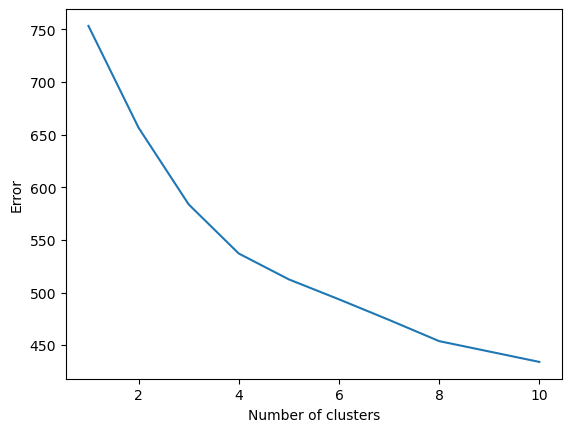

In [75]:
# SSE
error = np.zeros(11)
sh_score = np.zeros(11)
for k in range(1,11): # with 1 up to 10 clusters
    kmeans = sk_cluster.KMeans(init='k-means++', n_clusters=k, n_init=10)
    X = dtm.toarray()
    kmeans.fit_predict(X)
    error[k] = kmeans.inertia_
    if k>1: sh_score[k]= metrics.silhouette_score(X, kmeans.labels_)
plt.plot(range(1,len(error)),error[1:])
plt.xlabel('Number of clusters')
plt.ylabel('Error')

Text(0, 0.5, 'silhouette score')

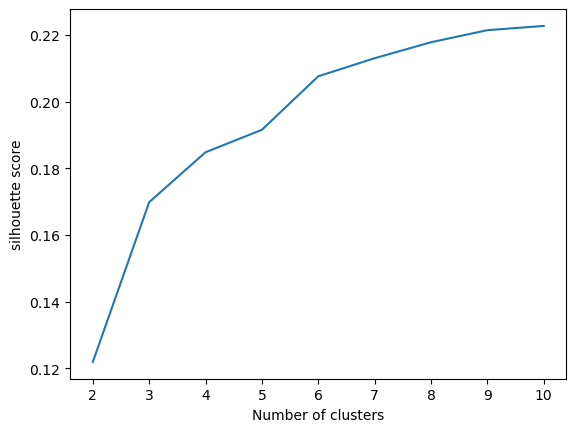

In [58]:
plt.plot(range(2,len(sh_score)),sh_score[2:])
plt.xlabel('Number of clusters')
plt.ylabel('silhouette score')

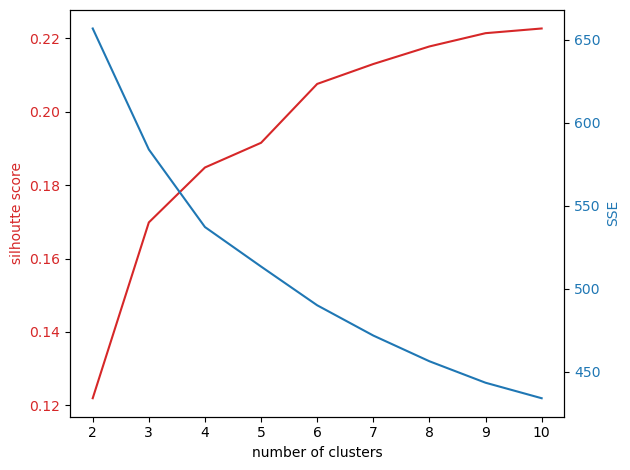

In [59]:
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('number of clusters')
ax1.set_ylabel('silhoutte score', color=color)
ax1.plot(range(2,len(sh_score)),sh_score[2:], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx() # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('SSE', color=color) # we already handled the x-label with ax1
ax2.plot(range(2,len(error)),error[2:], color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()

Συμπερασμα :

Συμφωνα με τα παραπάνω διαγραμματα βλέπουμε πως ο σωστός αριθμός των cluster βρίσκετε ανάμεσα στους 3 και 4. Αυτό το συμπαιρένουμε διότι στα σημεία αυτά συγκλίνουν και φαίνεται και οι δύο να κάνουν γωνίες. Νομίζω η απόφαση στο συγκεκριμένο γράφημα είναι μεταξύ του 3 και 4, προσωπικά θα προτιμούσα τους 4.

In [76]:
# run K-MEANS again with a different cluster number
kmeans = sk_cluster.KMeans(init='k-means++',n_clusters=4,n_init=10)
kmeans.fit_predict(dtm) 
centroids = kmeans.cluster_centers_
kmeans_labels = kmeans.labels_
error = kmeans.inertia_
print ("The total error of the clustering is: ", error)
print ('\nCluster labels')
print(kmeans_labels)
print ('\n Cluster Centroids')
print (centroids)

The total error of the clustering is:  537.0748591598395

Cluster labels
[2 3 0 1 1 2 0 0 3 3 0 3 1 0 3 1 3 1 3 1 0 3 1 1 2 2 2 2 3 0 1 3 2 0 3 3 1
 0 1 0 1 0 3 1 1 3 0 1 0 3 0 0 3 0 1 3 1 1 3 0 0 0 0 2 0 0 3 3 1 0 2 0 1 0
 0 1 0 2 0 3 0 1 0 0 3 3 0 0 0 1 0 1 0 0 1 0 0 2 3 1 1 0 0 0 2 3 2 0 1 0 0
 0 3 0 2 0 3 0 0 0 1 1 1 3 0 3 0 3 1 3 2 0 3 3 1 0 3 1 0 3 0 0 0 3 0 1 1 1
 3 2 3 2 3 0 3 0 2 1 0 2 0 0 2 0 3 2 0 0 0 0 0 0 0 1 2 3 2 0 2 1 0 0 0 0 2
 0 1 2 0 2 0 0 3 0 0 0 1 0 0 0 1 0 3 0 3 0 3 3 3 2 2 0 0 1 0 0 0 0 3 1 3 0
 3 0 3 1 0 0 0 1 0 3 1 0 1 3 0 0 2 0 0 0 3 0 0 3 2 1 3 2 2 0 0 3 3 1 3 2 0
 1 3 0 2 2 0 0 2 1 3 0 0 2 0 0 3 2 0 1 1 0 2 0 2 0 1 1 2 0 3 2 1 0 2 2 2 0
 2 2 0 0 1 0 0 2 0 0 3 0 1 0 2 0 1 3 0 0 0 0 3 0 0 3 0 0 2 3 0 1 2 3 3 1 3
 0 3 1 0 0 2 3 3 0 1 0 0 3 3 1 0 0 1 0 2 0 1 2 1 1 3 0 0 3 0 1 0 3 3 0 0 1
 1 2 0 1 0 3 0 0 3 0 1 3 0 3 3 3 0 2 3 0 1 1 0 0 0 0 2 0 1 0 3 0 0 0 0 0 2
 0 3 0 0 3 2 2 0 3 0 0 1 0 0 3 2 3 0 0 1 1 1 1 0 0 3 0 0 1 0 2 1 0 0 0 0 1
 0 1 0 2 0 0 2 0 3 2 3 2 2 

[[ 67  83 285   0]
 [  0 165  24   0]
 [137   0   1   0]
 [  0 183   6   0]]


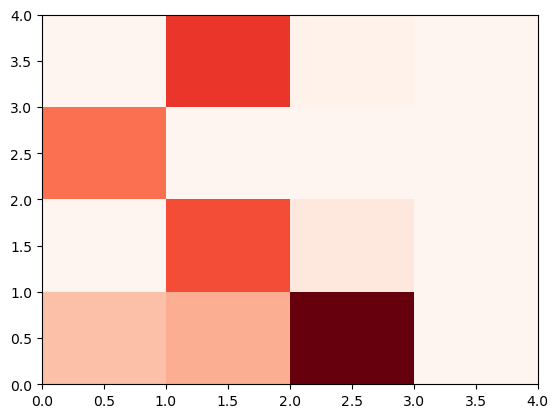

In [77]:
# confusion matrix
C= metrics.confusion_matrix(kmeans_labels,true_labels)
print (C)
plt.pcolormesh(C,cmap=plt.cm.Reds)

In [78]:
# 10 most important words for every cluster
words = 10 # words
k = 4 # clusters
print("Top terms per cluster:")
asc_order_centroids = kmeans.cluster_centers_.argsort()
order_centroids = asc_order_centroids[:,::-1]
terms = vectorizer.get_feature_names_out()
for i in range(k):
    print ("Cluster %d " %i )
    for ind in order_centroids[i, :words]:
        print (' %s' % terms[ind])
    print

Top terms per cluster:
Cluster 0 
 burger
 fries
 sandwich
 bar
 drive
 burgers
 breakfast
 ramen
 location
 wings
Cluster 1 
 pizza
 delivery
 crust
 wings
 pizzas
 pie
 slice
 fries
 salad
 pepperoni
Cluster 2 
 sushi
 roll
 rolls
 rice
 tuna
 salmon
 spicy
 sashimi
 japanese
 tempura
Cluster 3 
 pasta
 italian
 wine
 dinner
 table
 gnocchi
 bread
 dish
 dessert
 byob


Συμπέρασμα :

Παρατηρούμε πως με τους 4 clusters δεν παρατηρούμε το πρόβλημα που είχαμε πριν με το Italian και το Burgers. Όμως βλέπουμε έναν καινούργιο cluster που φαίνεται να έχει διαχωρίσει την κατηγορία italian.